# Car Price Prediction using a linear model

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model

In [2]:
#loading data
raw_data = pd.read_csv('train.csv')

### Summary stats

In [3]:
raw_data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
raw_data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
#Removing outliers
q = raw_data['Price'].quantile(0.99)
data = raw_data[raw_data['Price']<q]
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.904100e+04,19041.000000,19041.000000,19041.000000,19041.000000
mean,4.558293e+07,16093.007510,2010.864555,4.569245,6.562681
std,9.052741e+05,14709.166834,5.644919,1.183281,4.315106
min,2.074688e+07,1.000000,1939.000000,1.000000,0.000000
25%,4.570195e+07,5175.000000,2009.000000,4.000000,4.000000
50%,4.577236e+07,12858.000000,2012.000000,4.000000,6.000000
75%,4.580200e+07,21950.000000,2014.000000,4.000000,12.000000
max,4.581665e+07,83891.000000,2020.000000,16.000000,16.000000


In [7]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Text(0.5, 1.0, 'Price vs. No of cylinders')

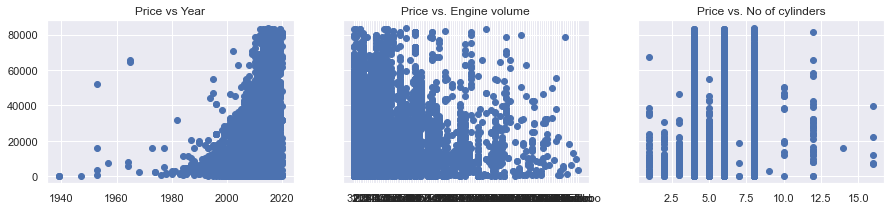

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data['Prod. year'], data['Price'])
ax1.set_title('Price vs Year')
ax2.scatter(data['Engine volume'], data['Price'])
ax2.set_title('Price vs. Engine volume')
ax3.scatter(data['Cylinders'], data['Price'])
ax3.set_title('Price vs. No of cylinders')

### Feature engineering

In [9]:
data = data.drop(['ID', 'Levy', 'Doors', 'Color', 'Model'], axis = 1)
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,12
1,16621,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,8
2,8467,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,2
3,3607,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,0
4,11726,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,4


In [10]:
#Feature engineering for 'Mileage' variable
data['Mileage'] = data['Mileage'].str.replace('km', '')
data['Mileage'] = data['Mileage'].astype(int)
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Airbags
0,13328,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,12
1,16621,CHEVROLET,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,8
2,8467,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,2
3,3607,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,0
4,11726,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,4


In [11]:
#Transforming 'Prod year' to a int type from object
data['Prod. year'] = data['Prod. year'].astype(int)

### Feature selection

In [12]:
# Transform Categorical columns into numeric columns
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
  if data[column].dtype == np.object:
    data[column] = LabelEncoder().fit_transform(data[column]) 
    

In [13]:
#On performing step-wise backward selection using p-values from statsmodels, the following variables were found to be insignificant
data = data.drop(['Manufacturer', 'Cylinders', 'Leather interior', 'Engine volume', 'Drive wheels', 'Fuel type'], axis = 1)

### The Regression

In [14]:
data.head()

,Price,Prod. year,Category,Mileage,Gear box type,Wheel,Airbags
0,13328,2010,4,186005,0,0,12
1,16621,2011,4,192000,2,0,8
2,8467,2006,3,200000,3,1,2
3,3607,2011,4,168966,0,0,0
4,11726,2014,3,91901,0,0,4


In [15]:
targets = data['Price']
inputs = data.drop(['Price'], axis = 1)

In [16]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(inputs, targets, test_size = 0.2, random_state = 42)


In [17]:
from sklearn.metrics import r2_score, mean_squared_log_error

In [18]:
#The Linear Model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [19]:
y_hat_cv_lr = np.abs(reg.predict(x_cv))

In [20]:
#MLR wirh statsmodels 
x1 = data.values[:, 0:-2]
x = sm.add_constant(x1)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              3404.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):                        0.00
Time:                        13:21:42   Log-Likelihood:                     -1.6726e+05
No. Observations:               15232   AIC:                                  3.345e+05
Df Residuals:                   15226   BIC:                                  3.346e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Prod. year       10.4312      0.165     63.172      0.000      10.108      10.755
Category       -526.8583     41.919    -12.569      0.000    -609.024    -444.693
Mileage       -5.738e-06   2.32e-06     -2.475      0.013   -1.03e-05   -1.19e-06
Gear box type  2476.4224    130.947     18.912      0.000    2219.751    2733.094
Wheel         -1.038e+04    437.344    -23.723      0.000   -1.12e+04   -9517.915
Airbags        -317.4792     27.349    -11.609      0.000    -371.086    -263.873
==============================================================================
Omnibus:                     3771.365   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8669.108
Skew:                           1.402   Prob(JB):                         0.00
Kurtosis:                       5.407   Cond. No.                     1.89e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
y_hat_cv = np.abs(results.predict(x_cv))

In [22]:
print('The RMSLE for the cross-validation set using statsmodels is = ',np.sqrt(mean_squared_log_error(y_cv, y_hat_cv)))

The RMSLE for the cross-validation set using statsmodels is =  1.6370181957106378


In [23]:
print("The RMSLE of LinearRegression using sci-kit learn =", np.sqrt(mean_squared_log_error(y_cv, y_hat_cv_lr)))

The RMSLE of LinearRegression using sci-kit learn = 1.6204090936351332


In [24]:
print("The intercept:", reg.intercept_)
print("The coeeficient:", reg.coef_)

The intercept: -1966582.4521583708
The coeeficient: [ 9.88932430e+02 -5.56998520e+02  9.87242629e-07  3.85425222e+03
 -7.04697752e+03 -6.06425590e+02]


### Testing

In [25]:
x_test = pd.read_csv('test.csv')

In [26]:
x_test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [27]:
x_test = x_test.drop(['ID', 'Levy', 'Doors', 'Price', 'Model', 'Color'], axis = 1)
x_test = x_test.drop(['Manufacturer', 'Cylinders', 'Leather interior', 'Engine volume', 'Drive wheels', 'Fuel type'], axis = 1)
x_test.head()

,Prod. year,Category,Mileage,Gear box type,Wheel,Airbags
0,2012,Hatchback,0 km,Manual,Left wheel,10
1,2012,Sedan,26000 km,Tiptronic,Left wheel,10
2,2005,Sedan,168000 km,Automatic,Right-hand drive,8
3,2012,Jeep,143000 km,Automatic,Left wheel,12
4,1993,Hatchback,200000 km,Manual,Left wheel,0


In [28]:
# Transform Categorical columns into numeric columns
from sklearn.preprocessing import LabelEncoder

for column in x_test.columns:
  if x_test[column].dtype == np.object:
    x_test[column] = LabelEncoder().fit_transform(x_test[column]) 
    

In [29]:
x_test.head()

,Prod. year,Category,Mileage,Gear box type,Wheel,Airbags
0,2012,3,0,1,0,10
1,2012,9,2066,2,0,10
2,2005,9,1202,0,1,8
3,2012,4,826,0,0,12
4,1993,3,1596,1,0,0


In [30]:
y_hat =np.abs(reg.predict(x_test))

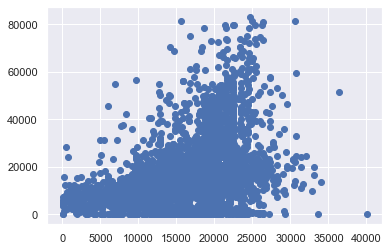

In [31]:
plt.scatter(y_hat_cv_lr, y_cv)
plt.show()

In [32]:
df = pd.DataFrame(y_hat, index = None, columns = ["Price"])
df.head()

,Price
0,19268.598443
1,19780.861582
2,684.297068
3,13644.497338
4,6543.139742


In [33]:
sub_test = df.to_csv('submission_linearmodel.csv', index = False)

In [34]:
check = pd.read_csv('submission_linearmodel.csv')
check.head()

,Price
0,19268.598443
1,19780.861582
2,684.297068
3,13644.497338
4,6543.139742


In [35]:
check.shape

(8245, 1)

#### The RMSLE for the linear model on the test dataset was = 1.63 
while for the cross-validation set = 1.62